In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns; sns.set()
import math
%matplotlib notebook

In [3]:
df_train = pd.read_csv("../../data/data_train.csv")
df_test = pd.read_csv("../../data/data_test.csv")
df_train['time_entry'] = pd.to_timedelta(df_train['time_entry'])
df_train['time_exit'] = pd.to_timedelta(df_train['time_exit'])
df_test['time_entry'] = pd.to_timedelta(df_test['time_entry'])
df_test['time_exit'] = pd.to_timedelta(df_test['time_exit'])
df_train['duration'] = df_train['time_exit'] - df_train['time_entry']
df_train['duration'] = df_train['duration'].dt.total_seconds()
df_test['duration'] = df_test['time_exit'] - df_test['time_entry']
df_test['duration'] = df_test['duration'].dt.total_seconds()
df_train['distance'] = df_train.apply(lambda row: (math.sqrt( ((row['x_entry'] - row['x_exit'])**2)+
                                                             ((row['y_entry']- row['y_exit'])**2) )), axis=1)
df_train['velocity'] = df_train.apply(lambda row: (row['distance']/row['duration'])
                                      if row['duration']!= 0.0 else 0.0, axis=1)

In [ ]:
print(df_train.shape[0], df_train.hash.nunique(), df_test.shape[0], df_test.hash.nunique())

In [ ]:
print(df_test[df_test['x_exit'].isnull()].time_entry.describe(), 
      df_test[df_test['x_exit'].isnull()].time_exit.describe())

In [4]:
df = df_train.groupby('hash')
df_list = list(df)
df_2 = df_test.groupby('hash')
df_2_list = list(df_2)

In [5]:
tt = df_train[(df_train['x_exit'] >= 3750901.5068) & (df_train['x_exit'] <= 3770901.5068) & 
              (df_train['y_exit'] >= -19268905.6133) & (df_train['y_exit'] <= -19208905.6133)]
tt2 = df_test[(df_test['x_exit'] >= 3750901.5068) & (df_test['x_exit'] <= 3770901.5068) & 
              (df_test['y_exit'] >= -19268905.6133) & (df_test['y_exit'] <= -19208905.6133)]

In [89]:
def plot_trajectory(df_sample):
    rect = patches.Rectangle((3750901.5068,-19208905.6133), (3770901.5068 - 3750901.5068),
                             (- 19268905.6133 + 19208905.6133),
                             linewidth=1,edgecolor='g',fill = False,hatch = '\\\\\\', label = 'city center')
    city = plt.gca().add_patch(rect)
    for index, row in df_sample.iterrows():
#         lines = plt.plot(df_sample.x_exit,df_sample.y_exit, label='Lines', color = 'g')
        arrows = plt.arrow(row['x_entry'], row['y_entry'], row['x_exit'] - row['x_entry'], row['y_exit'] - row['y_entry'],
                  label ='Trajectory', color = 'b')
    entries = plt.scatter(df_sample.x_entry,df_sample.y_entry, label='Entry point', color = 'b')
    exits = plt.scatter(df_sample.x_exit,df_sample.y_exit, label='Exit point', color = 'r')
#     lines = plt.plot(df_sample.x_exit,df_sample.y_exit, label='Lines', color = 'g')
    plt.legend(handles=[city, arrows])
    plt.grid(True)
    plt.show()

In [75]:
plot_trajectory(dd_1)

In [ ]:
for index, people in enumerate(df_2_list):
    if people[1].shape[0] <=2:
        print(index, ":",people[1].shape[0])

In [ ]:
df_train[(df_train['duration'] == 0.0) & (df_train['x_entry'] == df_train['x_exit']) &
         (df_train['y_entry'] == df_train['y_exit'])].shape[0]

In [ ]:
df_train[(df_train['duration'] == 0.0) & ((df_train['x_entry'] != df_train['x_exit']) |
         (df_train['y_entry'] != df_train['y_exit']))]

In [ ]:
df_test[(df_test['duration'] == 0.0) & (df_test.x_exit.isnull()) & (df_test.y_exit.isnull())].shape[0]

In [ ]:
df_train[(df_train['velocity'] != 0.0) & (df_train['velocity'] < 500)].velocity.describe()

In [ ]:
df_train[(df_train['velocity'] != 0.0)].velocity.describe()

In [ ]:
df_train = df_train.drop(df_train.index[643223])

In [ ]:
df_test[(df_test['duration'] > 0) & (df_test['duration'] < 5000) & (df_test.x_exit.isnull()) & (df_test.y_exit.isnull())].duration.describe()

In [ ]:
plt.scatter(df_train[df_train['velocity'] != 0.0].distance, df_train[df_train['velocity'] != 0.0].duration)

In [7]:
df_test['label']= -1
df_test['label'] = df_test.apply(lambda row: 1 
                                 if ((row['duration'] == 0.0)&(math.isnan(row['x_exit'])) & (math.isnan(row['y_exit'])) &
                                      (row['x_entry'] >= 3750901.5068) & (row['x_entry'] <= 3770901.5068) & 
                                      (row['y_entry'] >= -19268905.6133) & (row['y_entry'] <= -19208905.6133)) 
                                 else row['label'], axis=1)
df_test['label'] = df_test.apply(lambda row: 0 
                                 if ((row['duration'] == 0.0)&(math.isnan(row['x_exit'])) & (math.isnan(row['y_exit'])) &
                                     (row['label'] == -1))
                                 else row['label'], axis=1)

In [ ]:
df_test[df_test.x_exit.isnull()]['label'].value_counts()

In [ ]:
df_test['label'] = df_test['label'].replace(-1,0)

In [ ]:
df_test[df_test.x_exit.isnull()][['trajectory_id', 'label']].to_csv('output.csv', index=False)

# Train explore

In [15]:
df_train['label']= -1
df_train['label'] = df_train.apply(lambda row: 1 
                                 if ((row['x_exit'] >= 3750901.5068) & (row['x_exit'] <= 3770901.5068) & 
                                     (row['y_exit'] >= -19268905.6133) & (row['y_exit'] <= -19208905.6133)) 
                                 else 0, axis=1)

In [16]:
df_train.label.value_counts()

0    571050
1    243212
Name: label, dtype: int64

In [18]:
df_train[(df_train['duration'] == 0.0) & (df_train['x_exit'] >= 3750901.5068) & 
         (df_train['x_exit'] <= 3770901.5068) & (df_train['y_exit'] >= -19268905.6133) & 
         (df_train['y_exit'] <= -19208905.6133)]

1    129187
Name: label, dtype: int64

In [19]:
df_train.time_exit.describe()

count                    814262
mean     0 days 11:01:29.670819
std      0 days 03:53:45.396034
min             0 days 00:00:00
25%             0 days 08:37:23
50%             0 days 11:50:06
75%             0 days 14:18:50
max             0 days 16:00:00
Name: time_exit, dtype: object

In [21]:
start_time = '0 days 15:00:00'
end_time = '0 days 16:00:00'
dd = df_train[(df_train['time_exit'] >= start_time) & (df_train['time_exit'] <= end_time)]
dd.shape

(134063, 15)

In [30]:
dd[(dd['duration'] == 0.0) & (dd['x_exit'] >= 3750901.5068) & 
         (dd['x_exit'] <= 3770901.5068) & (dd['y_exit'] >= -19268905.6133) & 
         (dd['y_exit'] <= -19208905.6133)].label.value_counts()

1    19512
Name: label, dtype: int64

In [32]:
dd[(dd['duration'] == 0.0) & ((dd['x_exit'] < 3750901.5068) | 
         (dd['x_exit'] > 3770901.5068)) & ((dd['y_exit'] < -19268905.6133) | 
         (dd['y_exit'] > -19208905.6133))].label.value_counts()

0    17510
Name: label, dtype: int64

In [33]:
dd_1 = dd[(dd['duration'] != 0.0) & (dd['x_exit'] >= 3750901.5068) & 
         (dd['x_exit'] <= 3770901.5068) & (dd['y_exit'] >= -19268905.6133) & 
         (dd['y_exit'] <= -19208905.6133)]

In [36]:
dd_1.label.value_counts()

1    16868
Name: label, dtype: int64

<IPython.core.display.Javascript object>


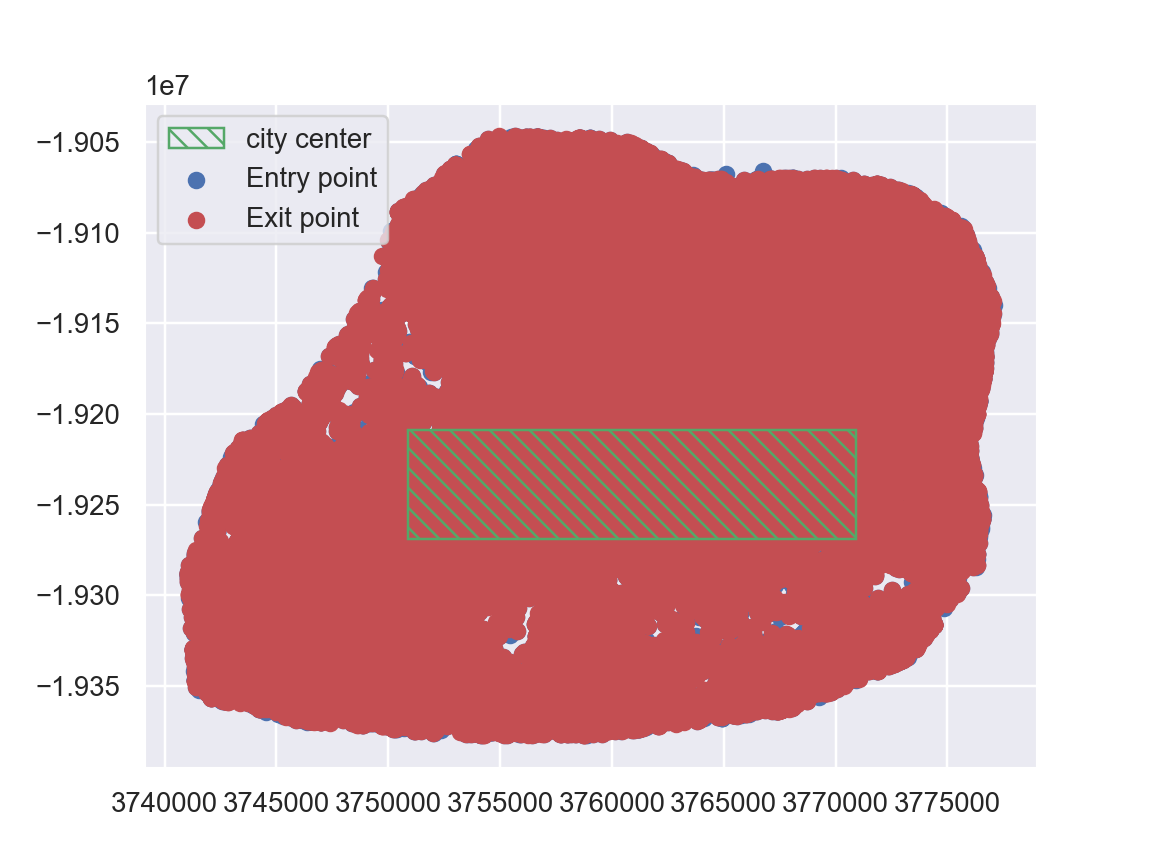

In [68]:
ax = sns.scatterplot(x="duration", y="city_distance", hue = 'label', data=dd[(dd['duration']!=0)&(dd['label'] == 1)])

In [ ]:
plt.clf()
plot_trajectory(dd_1)

<IPython.core.display.Javascript object>

In [64]:
def city_distance(px, py):
    dx = max(3770901.5068 - px, 0, px - 3750901.5068);
    dy = max(-19268905.6133 - py, 0, py + 19208905.6133);
  
    return math.sqrt(dx*dx + dy*dy);

In [65]:
dd['city_distance'] = -1
dd['city_distance'] = dd.apply(lambda row: city_distance(row['x_entry'], row['y_entry']), axis = 1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
dd.city_distance.describe()

count    134063.000000
mean      46090.707750
std       37340.628035
min       10000.340222
25%       15483.831734
50%       29594.362744
75%       68764.526305
max      162675.411384
Name: city_distance, dtype: float64

In [76]:
plt.clf()